In [2]:
from gensim import corpora, models
import gensim
import pandas as pd
import numpy as np

# Load data
dp = pd.read_csv('data/S&P500.csv')
headline = dp['HEADLINE']

In [23]:
# Preprocess the documents
texts = [[word for word in document.lower().split()] for document in headline]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Set the number of topics
num_topics = 10

# Train the LDA model using Gibbs sampling
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, iterations = 2000, random_state=100)


# Get the topic distribution for each document
for i, row in enumerate(lda_model[corpus]):
    print(f"Document {i}'s topic distribution: {row}")


Document 0's topic distribution: [(0, 0.0846133), (2, 0.6956396), (4, 0.10876437), (9, 0.08952425)]
Document 1's topic distribution: [(4, 0.36782894), (8, 0.6013478)]
Document 2's topic distribution: [(0, 0.2164743), (1, 0.08835813), (7, 0.14002906), (8, 0.10997687), (9, 0.41181904)]
Document 3's topic distribution: [(0, 0.6144902), (2, 0.084514394), (6, 0.18311839), (7, 0.077856)]
Document 4's topic distribution: [(0, 0.22899275), (5, 0.4476758), (6, 0.18277597), (8, 0.094383895)]
Document 5's topic distribution: [(2, 0.5137034), (6, 0.4195692)]
Document 6's topic distribution: [(0, 0.27316108), (1, 0.020046381), (2, 0.020046743), (3, 0.020047406), (4, 0.020046895), (5, 0.020046381), (6, 0.56646293), (7, 0.020049363), (8, 0.020046381), (9, 0.020046381)]
Document 7's topic distribution: [(1, 0.06305799), (6, 0.8987449)]
Document 8's topic distribution: [(1, 0.08402848), (6, 0.8587924)]
Document 9's topic distribution: [(0, 0.01113246), (1, 0.011128134), (2, 0.45238632), (3, 0.011128794

In [25]:
# Print the topics
topics = lda_model.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.050*"--" + 0.023*"the" + 0.019*"barrons.com" + 0.019*"wsj" + 0.017*"a" + 0.017*"for" + 0.017*"in" + 0.016*"mw"')
(1, '0.037*"the" + 0.033*"2023" + 0.028*"and" + 0.020*"corporation" + 0.017*"2024" + 0.017*"financial" + 0.017*"of" + 0.014*"announces"')
(2, '0.046*"of" + 0.041*"and" + 0.033*"press" + 0.033*"release:" + 0.030*"for" + 0.030*"to" + 0.027*"in" + 0.024*"with"')
(3, '0.050*"investors" + 0.042*"action" + 0.042*"securities" + 0.042*"class" + 0.040*"deadline" + 0.037*"in" + 0.035*"rosen," + 0.035*"to"')
(4, '0.093*"market" + 0.047*"-" + 0.041*"by" + 0.029*"to" + 0.025*"talk" + 0.025*"global" + 0.025*"report" + 0.023*"billion"')
(5, '0.053*"to" + 0.043*"when" + 0.041*"compared" + 0.032*"asset" + 0.025*"value(s)" + 0.023*"ft" + 0.018*"study" + 0.014*"cathie"')
(6, '0.051*"the" + 0.046*"of" + 0.041*"encourages" + 0.030*"news" + 0.025*"in" + 0.023*"company" + 0.022*"top" + 0.019*"--"')
(7, '0.123*"stock" + 0.069*"market" + 0.058*"inc." + 0.040*"outperforms" + 0.039*"underperfor

In [ ]:
# #aggregate each company's topic exposures each day
# index = 0
# days = dp['RPA_DATE_UTC']
# companies = dp['ENTITY_NAME']
# column_names = []
# for i in range(num_topics):
#     column_names.append('topic_' + str(i + 1))
# agg_df = pd.DataFrame(columns=column_names)
# dataset = lda_model[corpus]

# day_index = 0
# aggregate_topic_distr = [0] * num_topics
# while index + 1 < len(companies) and companies[index] == companies[index + 1]:
#     while index + 1 < len(days) and days[index] == days[index + 1]:
#         print(index)
#         for i in range(len(dataset[index])):
#             print(dataset[index])
#             topic_num = dataset[index][i][0]
#             topic_distr = dataset[index][i][1]
#             print(i)
#             print(topic_num)
#             aggregate_topic_distr[topic_num] += topic_distr
#             #print(aggregate_topic_distr)
#         index += 1
#     print(index)
#     for i in range(len(dataset[index])):
#         topic_num = dataset[index][i][0]
#         topic_distr = dataset[index][i][1]
#         aggregate_topic_distr[topic_num] += topic_distr
#     agg_df.loc[day_index] = aggregate_topic_distr
#     aggregate_topic_distr = [0] * topic_num
#     rename_mapping = {agg_df.index[day_index]: days[index]}
#     agg_df.rename(index=rename_mapping, inplace=True)
#     day_index += 1
#     if companies[index] == companies[index + 1]:
#         index += 1  
# print(agg_df)




In [20]:
import pandas as pd
#aggregate each company's topic exposures each day

num_topics = len(lda_model.get_topics())
days = dp['RPA_DATE_UTC']
companies = dp['ENTITY_NAME']

# Initialize a DataFrame to store aggregated topic distributions
column_names = ['topic_' + str(i) for i in range(num_topics)]
agg_df = pd.DataFrame(columns=column_names)

day_index = 0
# Aggregate topic exposures for each company and each day
for company in companies.unique():
    company_data = dp[dp['ENTITY_NAME'] == company]
    for day in company_data['RPA_DATE_UTC'].unique():
        day_data = company_data[company_data['RPA_DATE_UTC'] == day]
        aggregate_topic_distr = [0] * num_topics
        for index in day_data.index:
            doc_topics = lda_model.get_document_topics(corpus[index], minimum_probability=0)
            for topic_num, topic_prob in doc_topics:
                aggregate_topic_distr[topic_num] += topic_prob
        agg_df.loc[day_index] = aggregate_topic_distr
        aggregate_topic_distr = [0] * topic_num
        rename_mapping = {agg_df.index[day_index]: days[index]}
        agg_df.rename(index=rename_mapping, inplace=True)
        day_index += 1
print(agg_df)


              topic_0    topic_1    topic_2   topic_3    topic_4    topic_5  \
2023/12/1   11.954552   5.336568  18.167241  3.398873  20.293976   4.296573   
2023/12/2   10.209135  11.915059   3.857047  0.495330   2.540868   1.846325   
2023/12/3    0.776705   0.058597   0.201050  0.058594   0.521793   0.796096   
2023/12/4   10.068071   7.854840  28.203398  2.837814   8.395706   4.976878   
2023/12/5   15.873823  14.579233  32.899522  5.372541  13.748769  13.950360   
...               ...        ...        ...       ...        ...        ...   
2023/12/27   1.462981   0.603268   8.032431  0.817249   2.733426   0.402305   
2023/12/28   0.520485   0.118518   2.080919  0.302282   1.030910   0.217892   
2023/12/29   0.809407   0.205219   0.618464  0.069854   0.406241   0.803029   
2023/12/30   0.627310   0.235280   0.551886  0.128909   0.041553   0.041551   
2023/12/31   0.182495   0.005266   0.057614  0.005266   0.005266   0.057917   

              topic_6    topic_7    topic_8    topi

In [21]:
agg_df = agg_df[0:31]

[*********************100%***********************]  1 of 1 completed
Topic 1


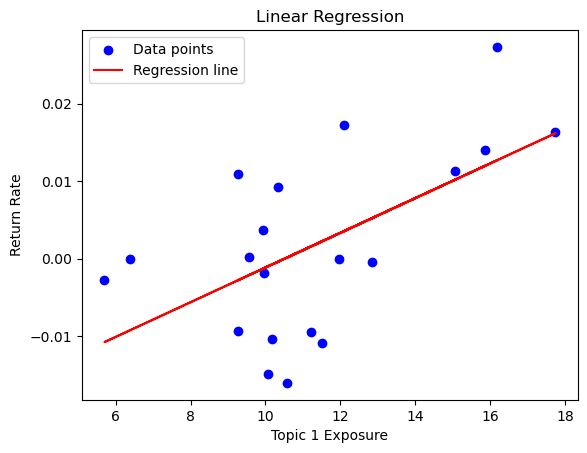

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     8.994
Date:                Fri, 12 Apr 2024   Prob (F-statistic):            0.00770
Time:                        09:33:04   Log-Likelihood:                 64.798
No. Observations:                  20   AIC:                            -125.6
Df Residuals:                      18   BIC:                            -123.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0236      0.009     -2.703      0.0

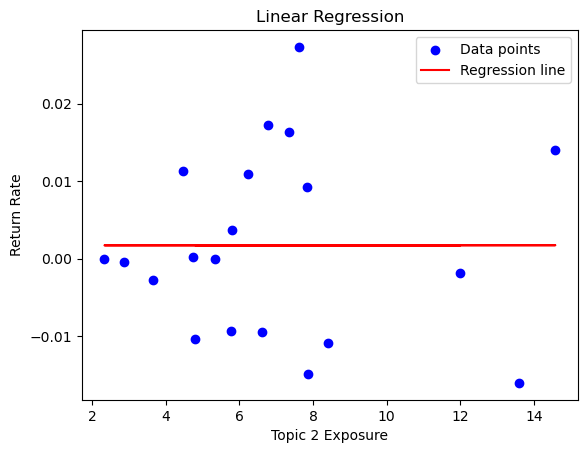

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                 1.987e-06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.999
Time:                        09:33:04   Log-Likelihood:                 60.745
No. Observations:                  20   AIC:                            -117.5
Df Residuals:                      18   BIC:                            -115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.007      0.260      0.7

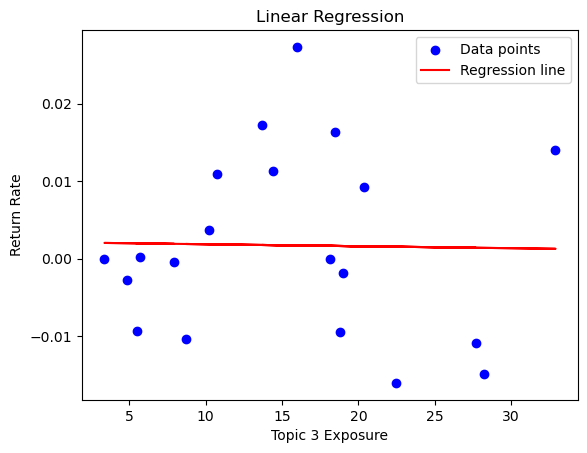

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.005883
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.940
Time:                        09:33:05   Log-Likelihood:                 60.749
No. Observations:                  20   AIC:                            -117.5
Df Residuals:                      18   BIC:                            -115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.006      0.362      0.7

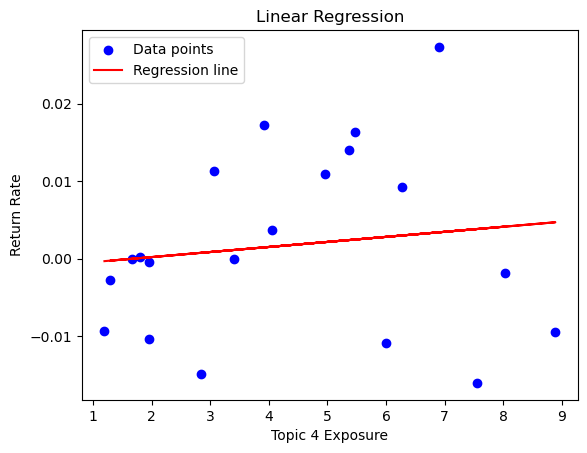

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.3173
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.580
Time:                        09:33:05   Log-Likelihood:                 60.920
No. Observations:                  20   AIC:                            -117.8
Df Residuals:                      18   BIC:                            -115.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.006     -0.195      0.8

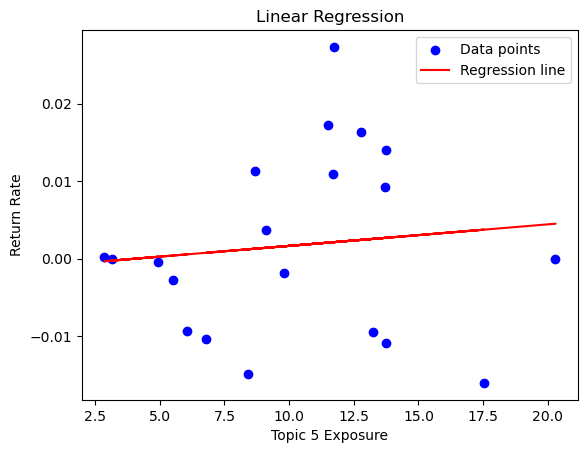

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.2108
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.652
Time:                        09:33:05   Log-Likelihood:                 60.862
No. Observations:                  20   AIC:                            -117.7
Df Residuals:                      18   BIC:                            -115.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.007     -0.168      0.8

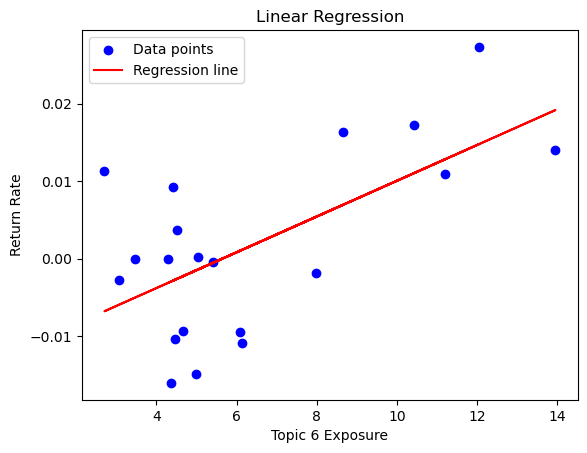

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     11.53
Date:                Fri, 12 Apr 2024   Prob (F-statistic):            0.00322
Time:                        09:33:05   Log-Likelihood:                 65.697
No. Observations:                  20   AIC:                            -127.4
Df Residuals:                      18   BIC:                            -125.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0131      0.005     -2.695      0.0

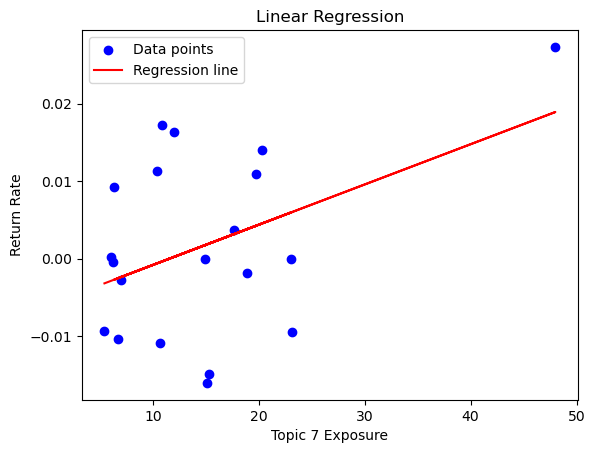

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     4.007
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0606
Time:                        09:33:05   Log-Likelihood:                 62.755
No. Observations:                  20   AIC:                            -121.5
Df Residuals:                      18   BIC:                            -119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0060      0.005     -1.314      0.2

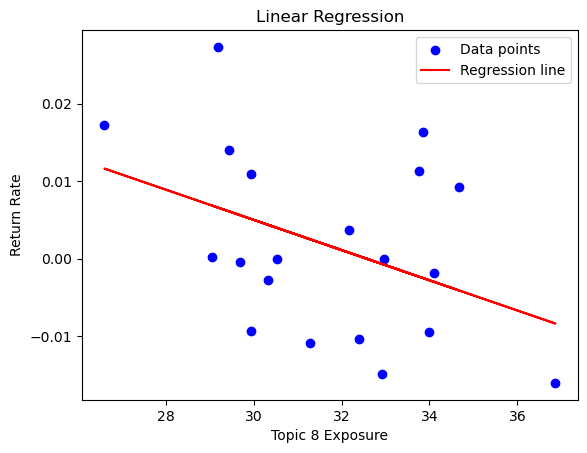

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3.577
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0748
Time:                        09:33:06   Log-Likelihood:                 62.558
No. Observations:                  20   AIC:                            -121.1
Df Residuals:                      18   BIC:                            -119.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0635      0.033      1.938      0.0

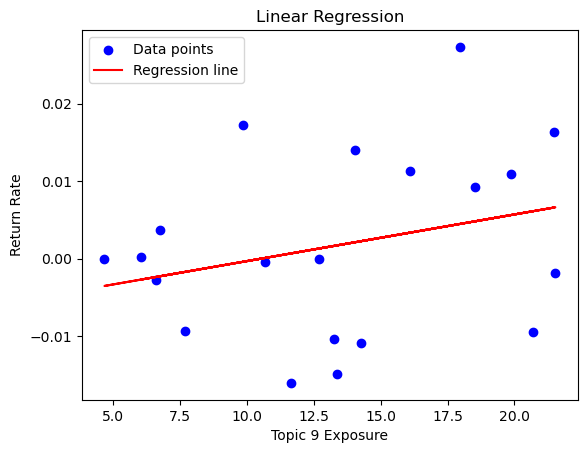

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.470
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.241
Time:                        09:33:06   Log-Likelihood:                 61.530
No. Observations:                  20   AIC:                            -119.1
Df Residuals:                      18   BIC:                            -117.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.007     -0.888      0.3

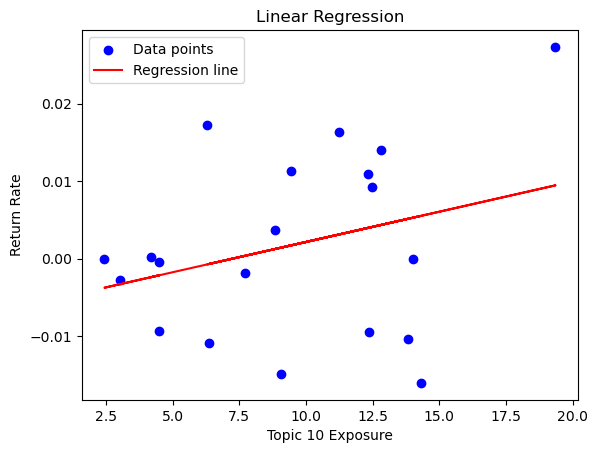

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.759
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.201
Time:                        09:33:06   Log-Likelihood:                 61.678
No. Observations:                  20   AIC:                            -119.4
Df Residuals:                      18   BIC:                            -117.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0057      0.006     -0.923      0.3

In [22]:
#get Amazon's stock price from 2023-12-01 to 2023-12-31 using yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = yf.download('AMZN', start='2023-12-01', end='2023-12-31')
close_price = data['Close']
return_rate = close_price.pct_change()
return_rate.index = pd.to_datetime(return_rate.index, format='%Y-%m-%d')
for i in range(agg_df.shape[1]):
    print(f'Topic {i+1}')
    topic_i = agg_df.iloc[:,i]
    topic_i.index = pd.to_datetime(topic_i.index, format='%Y/%m/%d')
    common_dates = return_rate.index.intersection(topic_i.index)
    filtered_return_rate = return_rate.loc[common_dates]
    filtered_return_rate.fillna(0, inplace=True)
    filtered_topic_i = topic_i.loc[common_dates]
    filtered_topic_i_reshaped = filtered_topic_i.values.reshape(-1, 1)
    model_sk = LinearRegression()
    model_sk.fit(filtered_topic_i_reshaped, filtered_return_rate)

    # Plot the data
    plt.scatter(filtered_topic_i, filtered_return_rate, color='blue', label='Data points')
    regression_line = model_sk.intercept_ + model_sk.coef_[0] * filtered_topic_i
    plt.plot(filtered_topic_i, regression_line, color='red', label='Regression line')
    plt.xlabel(f'Topic {i+1} Exposure')
    plt.ylabel('Return Rate')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    # Add a constant to the independent variable for the intercept
    X = sm.add_constant(filtered_topic_i_reshaped)
    # Fit the regression model
    model_sm = sm.OLS(filtered_return_rate, X).fit()
    # Print the summary of the regression
    print(model_sm.summary())
    print("\n")
